In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [134]:
def getJetData(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')


    cols.append('n_total')
    cols.append('n_charged')

    cols.append('jet_eta')
    cols.append('jet_theta')
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_qt_up')
    cols.append('jet_qt_down')


    cols.append('jet_z')
    cols.append('jet_z_up')
    cols.append('jet_z_down')

    cols.append('jet_lab_pt')
    cols.append('jet_lab_e')
    cols.append('jet_lab_eta')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [7]:
def getData(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')

    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [118]:
def applyEventCuts(df):
    temp = df
    temp = applyCut(temp, '0.1 < y < 0.85', '0.1 < y < 0.85')
    temp = applyCut(temp, 'Q2>100', 'Q2>100')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

def applyJetCuts(df):
    temp = df
    temp.eval('jet_qtnorm= jet_qt/sqrt(Q2)', inplace=True)
    temp.eval('jet_qtnorm_up= 1.01*jet_qt/sqrt(Q2)', inplace=True)
    temp.eval('jet_qtnorm_down= 0.99*jet_qt/sqrt(Q2)', inplace=True)

    #temp.eval('jet_qtnormjetpt= jet_qt_breit/sqrt(jet_pt)', inplace=True)
    #temp = applyCut(temp, ' jet_z>0.25', 'jet_z>0.25')
    #temp = applyCut(temp, ' jet_eta<0', 'jet eta <0')
    df = applyCut(df, 'jet_z<1.0', ' jet z<1.0')
    return temp

In [37]:
df = getData(['breit_10_100.root'])
xsec = np.mean(df['xsec'])
xsec = xsec*1e9
print 'xsection %2.2f [pb]' %(xsec)
accepted = df.shape[0]
print 'accepted events' , accepted
to_cross_section = xsec/(1.0*accepted)
lumi = 100 # in units of fb-1. 
to_counts = to_cross_section*1000*lumi #1000 accounts to pass from pb to fb
##Apply selection
df = applyEventCuts(df)

##Total cross-section: 
integrated_rate    = 1000*lumi*xsec #multiply by 1000 and then 100 to get integrated yield for 100 fb-1
print 'Integrated rate %2.3f [M]' %(integrated_rate/1e6)




Processed breit_10_100.root in 0.3 seconds
xsection 1096.93 [pb]
accepted events 500000
0.1 < y < 0.85 420391  fraction kept: 84.1
Q2>100 406797  fraction kept: 96.8
Integrated rate 109.693 [M]


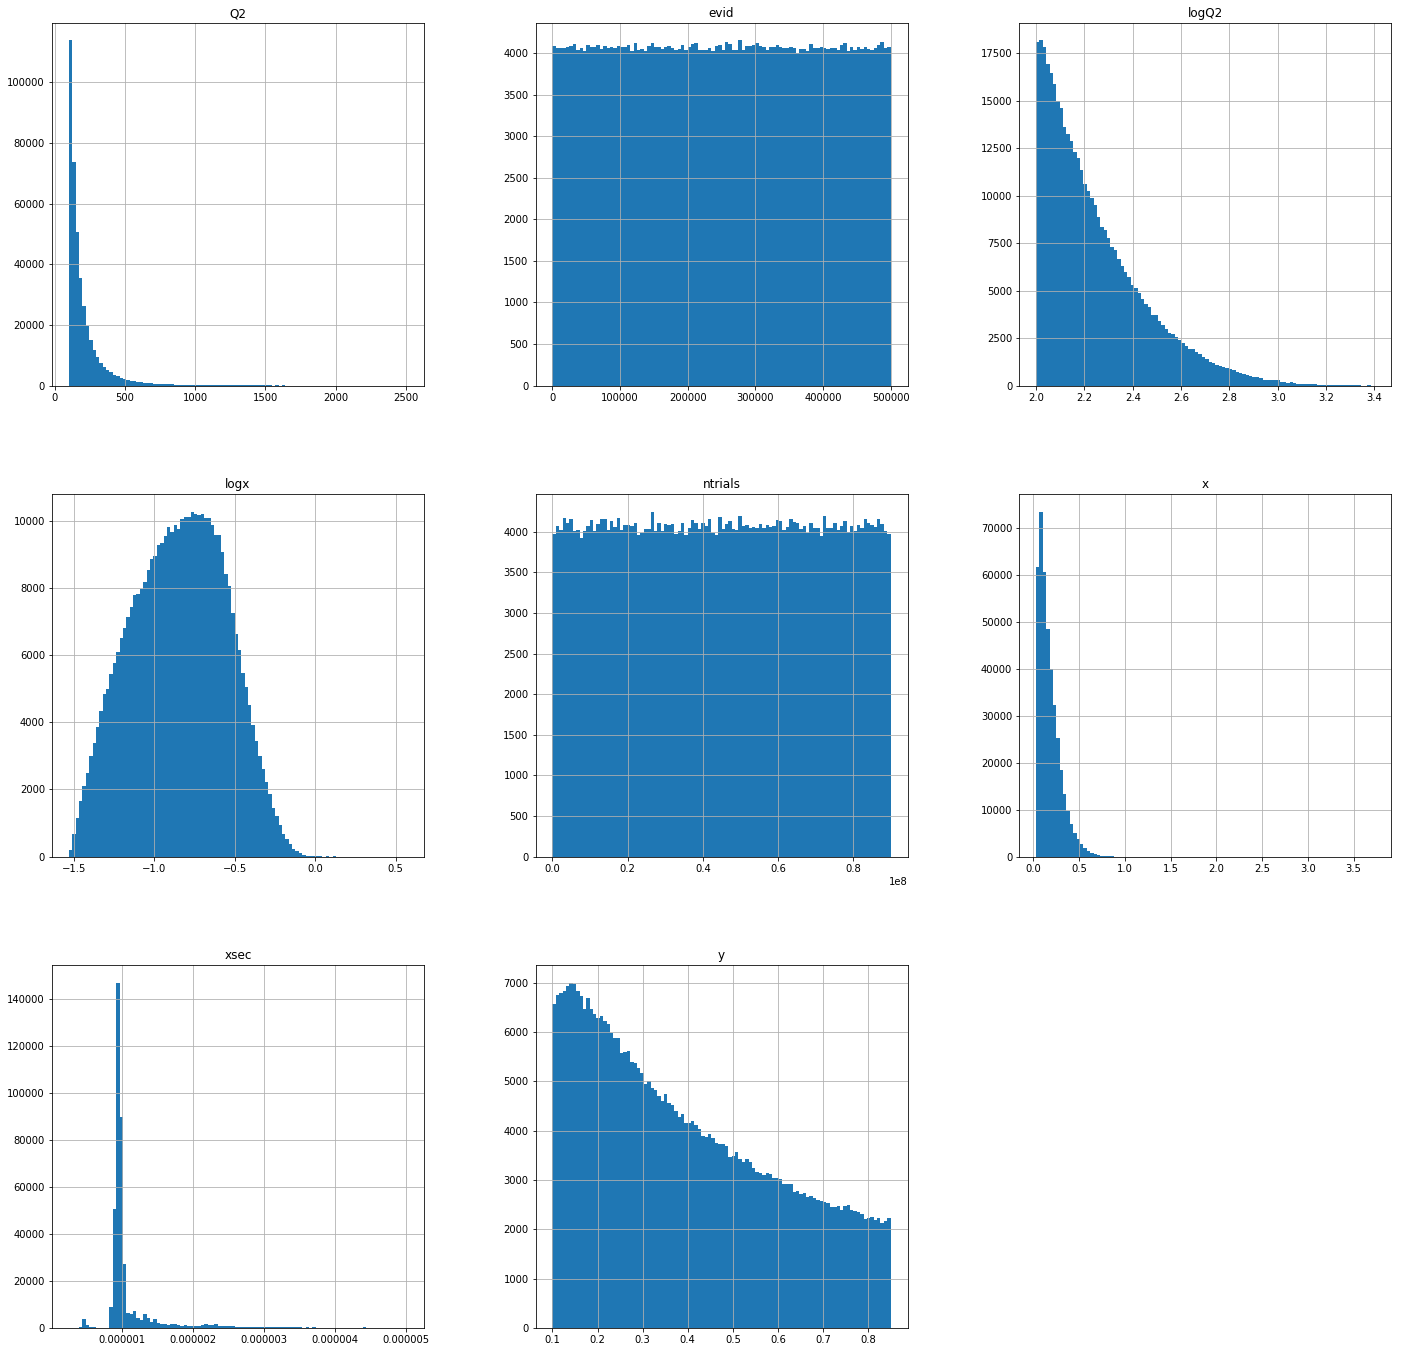

In [14]:
from matplotlib import rc
rc('text', usetex=False)
df.hist(figsize=(24,24),bins=100)
plt.show()

## Get Jet data apply selection

In [135]:
df_jet      = getJetData(['breit_10_100.root'])
df_jet = applyEventCuts(df_jet)
df_jet = applyJetCuts(df_jet)


Processed breit_10_100.root in 25.6 seconds
0.1 < y < 0.85 1726785  fraction kept: 84.9
Q2>100 1676071  fraction kept: 97.1
 jet z<1.0 1619212  fraction kept: 96.6


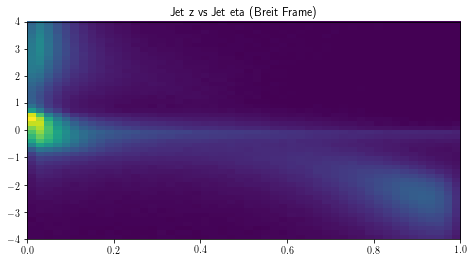

In [77]:
import matplotlib.colors as mcolors

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs
hb = ax.hist2d(df_jet.query('jet_z<1.0 and abs(jet_eta)<4.0')['jet_z'], df_jet.query('jet_z<1.0 and abs(jet_eta)<4.0')['jet_eta'], norm=mcolors.PowerNorm(0.5),bins=50)

ax.set_title('Jet z vs Jet eta (Breit Frame)')


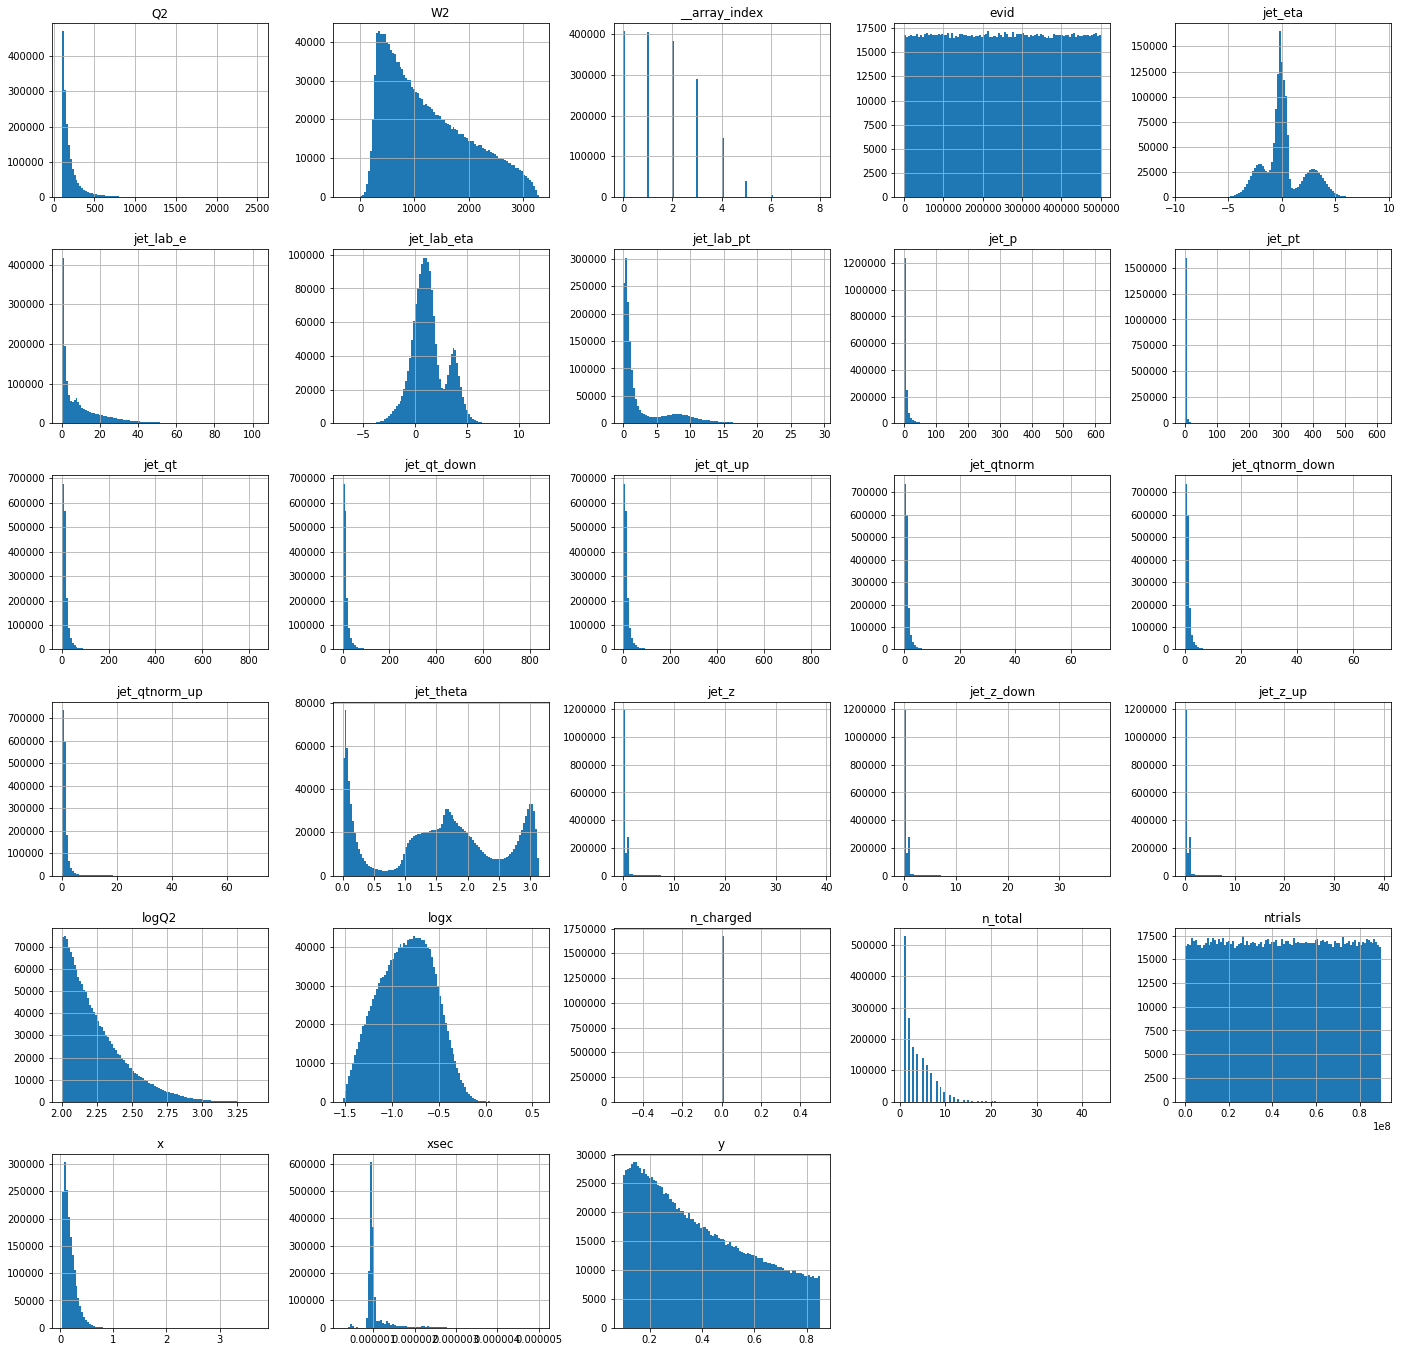

In [136]:
rc('text', usetex=False)
df_jet.hist(figsize=(24,24),bins=100)
plt.show()

9.564548
15.627374
[       0.          1555010.01172524  4708907.29284292  7468567.41382089
 12820715.30406483 20362996.51076661 18816981.33686313]
[       0.          3011296.19369931  5791139.85320419  9748210.33591979
 17016697.4547783  22956142.43889759  9157403.06143107]
[       0.         -1456286.18197406 -1082232.56036126 -2279642.9220989
 -4195982.15071346 -2593145.92813098  9659578.27543207]
[       0.          -728143.09098703  -541116.28018063 -1139821.46104945
 -2097991.07535673 -1296572.96406549  4829789.13771603]


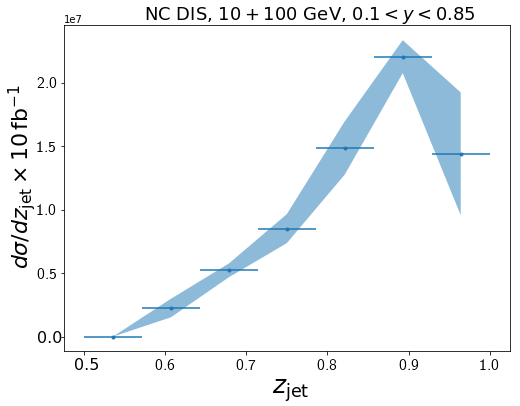

In [137]:
nbins = 7
minimo = 0.5
maximo = 1.0
fig = plt.figure(figsize=(8,6))
query = 'jet_z>0.6 and jet_lab_pt>5 and Q2>100'
print df_jet.query(query)['jet_lab_pt'].mean()
print df_jet.query(query)['jet_lab_e'].mean()

y, x  = np.histogram(df_jet.query(query)['jet_z'],bins=nbins,range=(minimo,maximo))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y*1000*lumi
erry = np.sqrt(y)
plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label=r'jet $\eta<$0')

y_up, x  = np.histogram(df_jet.query(query)['jet_z_up'],bins=nbins,range=(minimo,maximo))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y_up = y_up*to_cross_section
y_up = y_up*1000*lumi

y_do, x  = np.histogram(df_jet.query(query)['jet_z_down'],bins=nbins,range=(minimo,maximo))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y_do = y_do*to_cross_section
y_do = y_do*1000*lumi

print y_up 
print y_do
print y_up-y_do
print (y_up-y_do)/2.0
error= abs(y_up-y_do)/2.0
from matplotlib import rc
rc('text', usetex=True)
plt.fill_between(x, y-error, y+error,alpha=0.5,label='error')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel(r'$z_{\mathrm{jet}}$',fontsize=25)
plt.ylabel(r'$d\sigma/d z_{\mathrm{jet}} \times 10 \, \mathrm{fb}^{-1}$', fontsize=22)
plt.title('$\mathrm{NC}\ \mathrm{DIS}$, $10+100$ $\mathrm{GeV}$, $0.1<y<0.85$', fontsize=18)
plt.show()

[14571417.88498575 21454662.68152631 14211404.98582645  8099522.3790751
  4752345.77793344  2957107.78048033]
[15031251.54533791 21724069.04360287 14106318.95371353  7947487.68125828
  4645285.2692255   2878348.10296772]
[-459833.66035216 -269406.36207655  105086.03211292  152034.69781682
  107060.50870795   78759.67751261]
[-229916.83017608 -134703.18103828   52543.01605646   76017.34890841
   53530.25435397   39379.8387563 ]


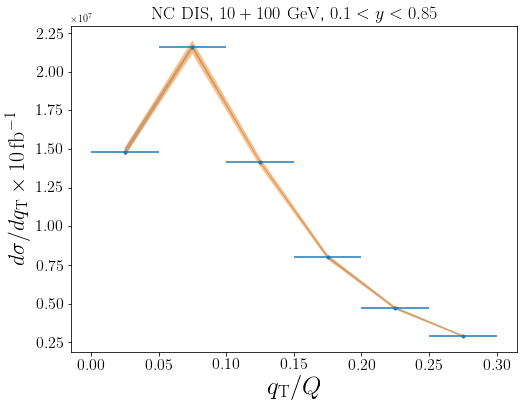

In [138]:
nbins = 6
fig = plt.figure(figsize=(8,6))
query = 'jet_z>0.5 and jet_lab_pt>5 and Q2>100'
minimo = 0
maximo = 0.3
y, x  = np.histogram(df_jet.query(query)['jet_qtnorm'],bins=nbins,range=(minimo,maximo))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y*1000*lumi
erry = np.sqrt(y)
plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label=r'jet $\eta<$0')

y_up, x  = np.histogram(df_jet.query(query)['jet_qtnorm_up'],bins=nbins,range=(minimo,maximo))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y_up = y_up*to_cross_section
y_up = y_up*1000*lumi

y_do, x  = np.histogram(df_jet.query(query)['jet_qtnorm_down'],bins=nbins,range=(minimo,maximo))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y_do = y_do*to_cross_section
y_do = y_do*1000*lumi

print y_up 
print y_do
print y_up-y_do
print (y_up-y_do)/2.0
error= abs(y_up-y_do)/2.0
from matplotlib import rc
rc('text', usetex=True)
plt.fill_between(x, y-error, y+error,alpha=0.5,label='error')
plt.fill_between(x, y*0.98, y*1.02,alpha=0.5,label='error')

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel(r'$q_{\mathrm{T}}/Q$',fontsize=25)
plt.ylabel(r'$d\sigma/d q_{\mathrm{T}} \times 10 \, \mathrm{fb}^{-1}$', fontsize=22)
plt.title('$\mathrm{NC}\ \mathrm{DIS}$, $10+100$ $\mathrm{GeV}$, $0.1<y<0.85$', fontsize=18)
plt.show()

In [145]:
query = 'jet_z<0.2 and Q2>100 and jet_eta<1.0'
print df_jet.query(query)['n_total'].mean()
print df_jet.query(query)['jet_lab_pt'].mean()
print df_jet.query(query)['jet_lab_e'].mean()

1.517692866871099
0.7358142
1.6756985


# plot the z distribution of jets in current and target framengtation

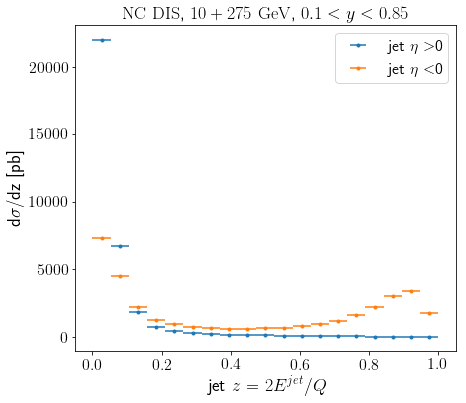

In [21]:
rc('text', usetex=True)

fig, ax1 = plt.subplots(figsize=(15,6))

##Electron distribution
plt.subplot(121)
y, x  = np.histogram(df_jet.query('jet_eta>0')['jet_z'],bins=np.linspace(0,1.0,20))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y/(xerr*2.0)
plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label=r'jet $\eta>$0')

y, x  = np.histogram(df_jet.query('jet_eta<0')['jet_z'],bins=np.linspace(0,1.0,20))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y/(xerr*2.0)
plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label=r'jet $\eta<$0')

plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('jet $z$ = $2E^{jet}/Q$',fontsize=18)
plt.ylabel(r'd$\sigma$/dz [pb]',fontsize=18)
plt.title('$\mathrm{NC}\ \mathrm{DIS}$, $10+275$ $\mathrm{GeV}$, $0.1<y<0.85$', fontsize=18)

In [ ]:
## z distribution:

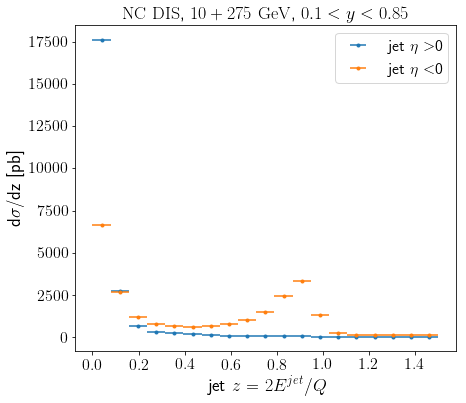

In [22]:
rc('text', usetex=True)

fig, ax1 = plt.subplots(figsize=(15,6))

##Electron distribution
plt.subplot(121)
y, x  = np.histogram(df_jet.query('jet_eta>0')['jet_z'],bins=np.linspace(0,1.5,20))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y/(xerr*2.0)
plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label=r'jet $\eta>$0')

y, x  = np.histogram(df_jet.query('jet_eta<0')['jet_z'],bins=np.linspace(0,1.5,20))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y*to_cross_section
y = y/(xerr*2.0)
plt.errorbar(x,y,  xerr = xerr, fmt='.',ls='none',label=r'jet $\eta<$0')

plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('jet $z$ = $2E^{jet}/Q$',fontsize=18)
plt.ylabel(r'd$\sigma$/dz [pb]',fontsize=18)
plt.title('$\mathrm{NC}\ \mathrm{DIS}$, $10+275$ $\mathrm{GeV}$, $0.1<y<0.85$', fontsize=18)


KeyError: 'jet_qtnorm'

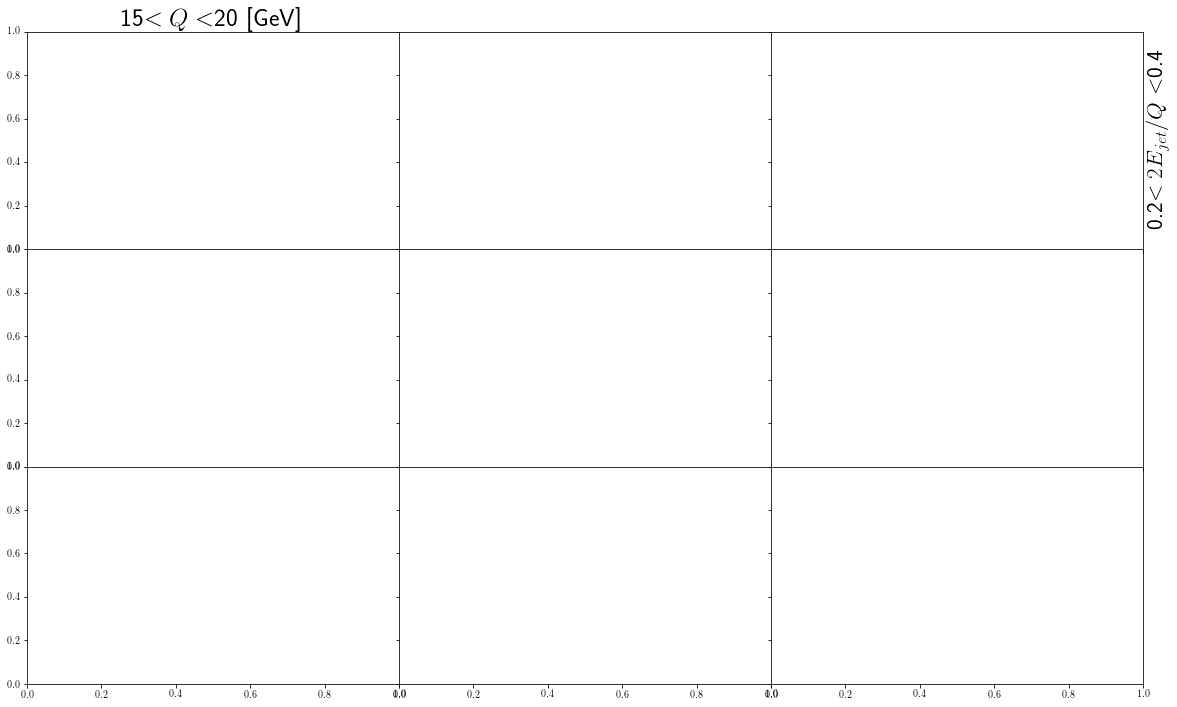

In [23]:
from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(3, 3, sharex=True, sharey='row', figsize=(20,12),gridspec_kw={'hspace':0,'wspace':0})

for counter,edges in enumerate([(15,20),(20,25),(25,30)]):
    df_Q2cut = df_jet.query('sqrt(Q2)> %2.2f and sqrt(Q2)<%2.2f'%(edges[0],edges[1]))
    axs[0,counter].set_title(r' %2.0f$<Q<$%2.0f [GeV]'%(edges[0],edges[1]), fontsize=25)
    
    for zcounter,zedges in enumerate([(0.2,0.4), (0.4,0.6),(0.6,1.0)]):
        df_zcut = df_Q2cut.query('jet_z> %2.2f and jet_z<%2.2f'%(zedges[0],zedges[1]))
        axs[zcounter,2].yaxis.set_label_position("right")
        axs[zcounter,2].yaxis.set_label_text(' %2.1f$<2E_{jet}/Q<$%2.1f'%(zedges[0],zedges[1]),fontsize=23)
        #for xcounter,xedges in enumerate([(0.1,0.15), (0.15,0.2),(0.2,0.25),(0.25,0.30),(0.30,0.35),(0.35,0.40)]):
        for xcounter,xedges in enumerate([(0.1,0.2), (0.2,0.3),(0.3,0.4),(0.4,0.6)]):
            df_xcut = df_zcut.query('x> %2.2f and x<%2.2f'%(xedges[0],xedges[1]))
            y, x  = np.histogram(df_xcut['jet_qtnorm'],bins=6,range=(0,0.3))
            x = (x[1:]+x[:-1])/2
            y = y*to_cross_section
            y = y*1000*lumi
            erry = np.sqrt(y)
            label = '%2.1f$<x<$%2.1f'%(xedges[0],xedges[1])
            row = counter%3
            axs[zcounter,counter].errorbar(x,y,yerr=erry, fmt='-o',label=label)
            axs[zcounter,counter].semilogy()
            axs[zcounter,counter].tick_params('both',labelsize=20)

    
axs[2,0].xaxis.set_label_text(r'$q_{T}/Q$', fontsize=25)
axs[2,1].xaxis.set_label_text(r'$q_{T}/Q$', fontsize=25)
axs[2,2].xaxis.set_label_text(r'$q_{T}/Q$', fontsize=25)

axs[0,0].yaxis.set_label_text(r'$\mathrm{d \sigma}\times 100 $ fb^{-1}', fontsize=23)
axs[1,0].yaxis.set_label_text(r'$\mathrm{d \sigma}\times 100 $ fb^{-1}', fontsize=23)
axs[2,0].yaxis.set_label_text(r'$\mathrm{d \sigma}\times 100 $ fb^{-1}', fontsize=23)

axs[0,2].legend(fontsize=20,frameon=False,ncol=2)





axs[0,0].tick_params('both',labelsize=20)
#axs[0,0].xticks(fontsize=20)

    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    #axs[counter].text(0.07,10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                   #   r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

#axs[1].set_title(r'NC\ DIS \ $10+275$ \ $\mathrm{GeV}$, 100 $\mathrm{fb}^{-1}$ , $0.1<y<0.85$, $Q^{2}>25$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetqt.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetqt.pdf', bbox_inches='tight')